# 1.5

### Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_delta_t(delta_x, buffer):
    return 0.5 * np.square(delta_x) * buffer

### Initialization

In [3]:
space_steps = 101
    
delta_x = 1/(space_steps - 1)
delta_t = get_delta_t(delta_x, 0.5) #0.005 * 0.5 = 0.0025 (delta_t)

time_step_space = 0.3

time_steps = int(np.ceil(time_step_space / delta_t))

current_temperature = np.zeros(space_steps)
next_temperature = np.zeros(space_steps)
plot_data = []

current_temperature[0] = 350
current_temperature[-1] = 250

next_temperature[0] = 350
next_temperature[-1] = 250

### Heat simulation

In [4]:
for i in range(space_steps - 2):
        j = (i + 1) * delta_x
        current_temperature[i + 1] = 350 - 100 * j + 200 * np.sin(np.pi * j)
    
for t in range(time_steps):
    if time_step_space - t * delta_t < delta_t:
        delta_t = time_step_space - t * delta_t
        
    eta_1 = (current_temperature[-1] - current_temperature[-2]) / delta_x
    
    for j in range(space_steps - 2):
        i = j + 1
        next_temperature[i] = current_temperature[i] + delta_t/np.square(delta_x) * (current_temperature[i + 1] - 2 * current_temperature[i] + current_temperature[i - 1])
    
    next_temperature[-1] = current_temperature[-1] + eta_1 * delta_t
    
    current_temperature = next_temperature.copy()
    plot_data.append(current_temperature.copy())
        

### 3D Plot

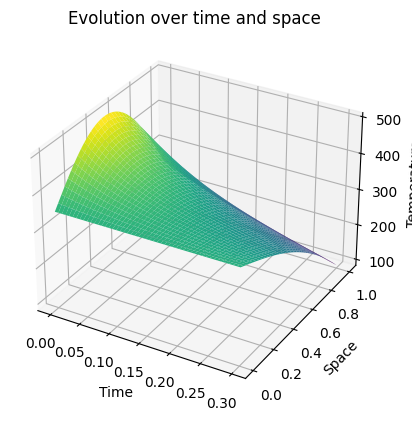

In [5]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, time_step_space, time_steps)

Time, Space = np.meshgrid(time, space)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Time, Space, data_np, cmap='viridis') 

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Temperature')
ax.set_title('Evolution over time and space')
plt.show()

### 2D Plot

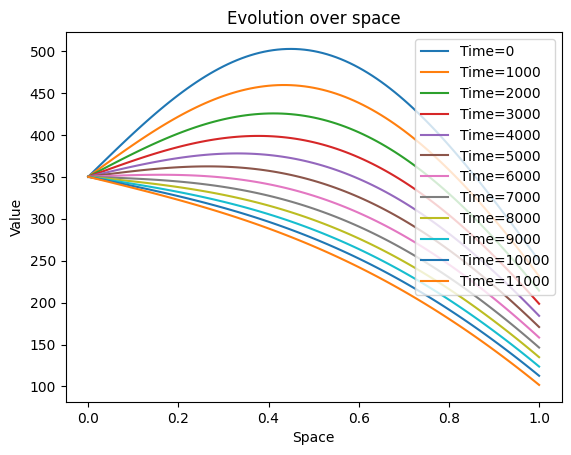

In [6]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, 1, time_steps)

# Plotting for discrete timestamp values
for t in range(0, time_steps, 1000):  # Change the step size as per your requirement
    plt.plot(space, data_np[:, t], label=f'Time={t}')

plt.xlabel('Space')
plt.ylabel('Value')
plt.title('Evolution over space')
plt.legend()
plt.show()